# SC1015 Assignment

## Table of Contents
---
1. Importing the Data
    - Why we are only using 2018 and 2019 data
    - Importing the actual data 
2. Data Cleaning
    - Date and Time
3. EDA
---
## Problem Statement
How do we predict a flight delay

### Motivation
Returning from covid

### Dataset
The dataset includes 2018 to 2020
However, only 2018 and 2019 is used as explained more in-depth
---
## Import Libraries


In [34]:
#imports
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from plotly_calplot import calplot
import seaborn as sb

pd.set_option("display.max_columns", 500)
plt.style.use('dark_background')

## Importing the data

In [2]:
# Mount from google colab
# from google.colab import drive
# drive.mount('/content/drive')
# root = "/content/drive/MyDrive/Datasets/SC1015/"

# Personal laptops
root = "../data/"

### Importing the data to be used

In [3]:
# Import the data that will actually be used
years = [2018, 2019]
dataframes = []
column_subset = ['FlightDate',
                 'Airline',
                 'Operating_Airline',
                 'Origin',
                 'Dest',
                 'Cancelled',
                 'Diverted',
                 'CRSArrTime',
                 'CRSDepTime',
                 'DepTime',
                 'ArrTime',
                 'ArrDelayMinutes',
                 'DepDelayMinutes', 
                 'OriginAirportID',
                 'OriginStateName',
                 'DestAirportID',
                 'DestCityName',
                 'DestStateName',
                 'DayofMonth',
                 'DayOfWeek',
                 'CarrierDelay',
                 'WeatherDelay',
                 'NASDelay',
                 'SecurityDelay',
                 'LateAircraftDelay'
                ]

for year in years:
    # df = pd.read_parquet(f"{root}flights_{year}.parquet", columns=column_subset)
    df = pd.read_parquet(f"{root}flights_{year}.parquet")
    dataframes.append(df)
del df

flights_df = pd.concat(dataframes).reset_index(drop=True)

In [4]:
flights_df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [5]:
display(flights_df.shape)
display(flights_df.dtypes)

(13781196, 61)

FlightDate            datetime64[ns]
Airline                       object
Origin                        object
Dest                          object
Cancelled                       bool
                           ...      
ArrDel15                     float64
ArrivalDelayGroups           float64
ArrTimeBlk                    object
DistanceGroup                  int64
DivAirportLandings           float64
Length: 61, dtype: object

In [6]:
# Airports
airports_df = pd.read_csv(f"{root}airlines.csv")

## Data Cleaning

### Categorising appropriate columns

In [7]:
flights_df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [8]:
flights_df.describe() 

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,1.378120e+07,1.354792e+07,1.354670e+07,1.354670e+07,1.353366e+07,1.350388e+07,1.349750e+07,1.378118e+07,1.350443e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.354670e+07,1.354670e+07,1.353408e+07,1.353409e+07,1.352673e+07,1.352672e+07,1.378120e+07,1.350388e+07,1.350388e+07,1.350388e+07,1.378120e+07,1.378120e+07
mean,1.330309e+03,1.334702e+03,1.394830e+01,1.065226e+01,1.462606e+03,1.411466e+01,1.088606e+02,1.385267e+02,1.337362e+02,7.762698e+02,2.018587e+03,2.623622e+00,6.869385e+00,1.574990e+01,3.939982e+00,1.982986e+04,2.682364e+03,2.000091e+04,2.682301e+03,1.269441e+04,1.269445e+06,3.177332e+04,2.711809e+01,5.466624e+01,1.269436e+04,1.269440e+06,3.177330e+04,2.711828e+01,5.466675e+01,1.874786e-01,7.326225e-02,1.734055e+01,1.358626e+03,1.458387e+03,7.599759e+00,1.483724e+03,5.567786e+00,1.937070e-01,-1.677460e-01,3.580041e+00,3.781457e-03
std,4.909026e+02,5.047816e+02,4.687052e+01,4.799074e+01,5.396836e+02,4.665277e+01,6.991461e+01,7.184688e+01,7.185907e+01,5.878239e+02,4.923456e-01,1.116294e+00,3.462741e+00,8.768915e+00,1.998046e+00,2.850319e+02,1.869317e+03,4.017526e+02,1.869353e+03,1.516753e+03,1.516752e+05,1.308727e+03,1.653815e+01,2.661104e+01,1.516743e+03,1.516741e+05,1.308694e+03,1.653840e+01,2.661102e+01,3.902953e-01,2.263952e+00,9.981422e+00,5.062631e+02,5.353924e+02,6.090902e+00,5.193956e+02,5.006669e+01,3.952020e-01,2.406619e+00,2.316868e+00,1.172389e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+03,1.000000e+00,0.000000e+00,-1.244000e+03,-1.430000e+02,-1.228000e+03,1.600000e+01,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013505e+06,3.007000e+04,1.000000e+00,1.000000e+00,1.013500e+04,1.013505e+06,3.007000e+04,1.000000e+00,1.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.290000e+03,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.150000e+02,9.160000e+02,0.000000e+00,-6.000000e+00,1.047000e+03,0.000000e+00,5.800000e+01,8.700000e+01,8.200000e+01,3.470000e+02,2.018000e+03,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,1.059000e+03,1.979000e+04,1.059000e+03,1.129200e+04,1.129202e+06,3.072100e+04,1.200000e+01,3.400000e+01,1.129200e+04,1.129202e+06,3.072100e+04,1.200000e+01,3.400000e+01,0.000000e+00,-1.000000e+00,1.100000e+01,9.320000e+02,1.043000e+03,4.000000e+00,1.100000e+03,-1.500000e+01,0.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00
50%,1.323000e+03,1.327000e+03,0.000000e+00,-2.000000e+00,1.502000e+03,0.000000e+00,9.000000e+01,1.200000e+02,1.160000e+02,6.120000e+02,2.019000e+03,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,2.242000e+03,1.997700e+04,2.242000e+03,1.288900e+04,1.288903e+06,3.145300e+04,2.600000e+01,4.400000e+01,1.288900e+04,1.288903e+06,3.145300e+04,2.600000e+01,4.400000e+01,0.000000e+00,-1.000000e+00,1.500000e+01,1.341000e+03,1.459000e+03,6.000000e+00,1.512000e+03,-6.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.735000e+03,1.745000e+03,7.000000e+00,7.000000e+00,1.915000e+03,8.000000e+00,1.380000e+02,1.680000e+02,1.640000e+02,1.010000e+03,2.019000e+03,4.000000e+00,1.000000e+01,2.300000e+01,6.000

In [9]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    flights_df[c] = flights_df[c].astype("category")

bins = [0, 15, 45, np.inf]
labels = ['Small Delays', 'Medium Delays', 'Large Delays']
flights_df['DelayCategory'] = pd.cut(flights_df['ArrDelayMinutes'], bins=bins, labels=labels, right=False)

### Creating a new column to get the expected Departure and Arrival times

In [10]:
time_cols = ["ArrTime", "DepTime", "CRSArrTime", "CRSDepTime"]
for col in time_cols:
    flights_df[col] = flights_df[col].fillna(0)
    flights_df[col] = pd.to_numeric(flights_df[col], errors='coerce')
    flights_df[col] = flights_df[col].astype(int)
    flights_df[col] = flights_df[col].astype(str)

In [11]:
def combine_date_time(date_col, time_col, new_col_name):
    date_str = flights_df[date_col].astype(str)
    time_str = flights_df[time_col].astype(str)
    time_str = time_str.apply(lambda x: x.zfill(4) if len(x) < 4 else x.rjust(4, '0'))
    datetime_str = date_str + ' ' + time_str
    
    flights_df[new_col_name] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H%M')


In [12]:
combine_date_time("FlightDate", "CRSDepTime", "CRSDepFlightDate")

In [13]:
flights_df.loc[:5, ["CRSDepFlightDate", "CRSDepTime", "DepTime", "DepDelayMinutes", "CRSArrTime", "ArrTime", "ArrDelayMinutes"]]

,CRSDepFlightDate,CRSDepTime,DepTime,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelayMinutes
0,2018-01-23 12:02:00,1202,1157,0.0,1304,1256,0.0
1,2018-01-24 12:02:00,1202,1157,0.0,1304,1258,0.0
2,2018-01-25 12:02:00,1202,1153,0.0,1304,1302,0.0
3,2018-01-26 12:02:00,1202,1150,0.0,1304,1253,0.0
4,2018-01-27 14:00:00,1400,1355,0.0,1500,1459,0.0
5,2018-01-28 12:02:00,1202,1202,NaN,1304,1326,22.0


### Categorising Flight Delays By Length
Based on: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
Flight delays can be categorised into 3 different categories.
- Small Delays (Up to 15 minutes)
- Medium Delays (15 - 45 minutes) 
- Large Delays (More than 45 minutes)

In [57]:
bins = [1, 15, 45, np.inf]
labels = ['SmallDelays', 'MediumDelays', 'LargeDelays']
flights_df['DelayCategory'] = pd.cut(flights_df['ArrDelayMinutes'], bins=bins, labels=labels, right=False)

### Checking how complete the dataset is


In [15]:
missing_df = flights_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights_df.shape[0]-missing_df['missing values'])/flights_df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,AirTime,283691,97.941463
1,DelayCategory,277313,97.987744
2,ArrivalDelayGroups,277313,97.987744
3,ArrDel15,277313,97.987744
4,ArrDelay,277313,97.987744
...,...,...,...
58,Flight_Number_Operating_Airline,0,100.000000
59,CRSDepFlightDate,0,100.000000
60,OriginAirportSeqID,0,100.000000
61,OriginCityName,0,100.000000


## EDA

### Which airline has the most delays

In [16]:
flights_df['Airline'].value_counts()

Southwest Airlines Co.                       2716498
Delta Air Lines Inc.                         1453704
SkyWest Airlines Inc.                        1368547
American Airlines Inc.                       1331959
United Air Lines Inc.                        1247475
JetBlue Airways                               602421
Republic Airlines                             533125
Envoy Air                                     454834
Alaska Airlines Inc.                          449568
Comair Inc.                                   406121
Mesa Airlines Inc.                            381528
Spirit Air Lines                              381023
Endeavor Air Inc.                             377276
ExpressJet Airlines Inc.                      301457
Frontier Airlines Inc.                        255578
Horizon Air                                   207142
Air Wisconsin Airlines Corp                   205657
Allegiant Air                                 201526
Hawaiian Airlines Inc.                        

### Taking a look at the delay time categories

We'll start by plotting for the frequency of delays in those categories

In [59]:
flights_df['DelayCategory'].value_counts()

SmallDelays     2131762
MediumDelays    1415243
LargeDelays     1200554
Name: DelayCategory, dtype: int64

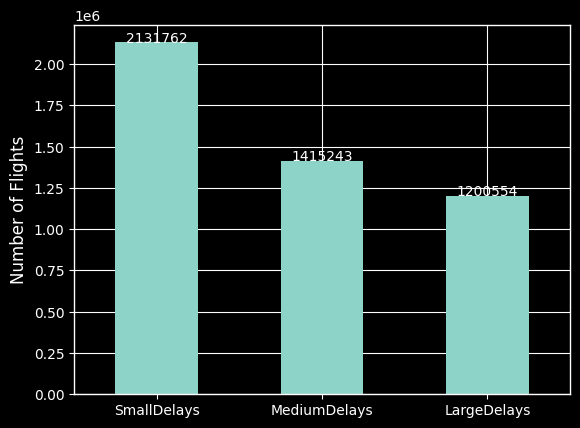

In [61]:
category_counts = flights_df['DelayCategory'].value_counts()

ax = category_counts.plot(kind='bar')
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Number of Flights')

for i, v in enumerate(category_counts):
    ax.text(i, v + 1000, str(v), ha='center')

plt.show()

### Flights Categorised by Time
#### By Year

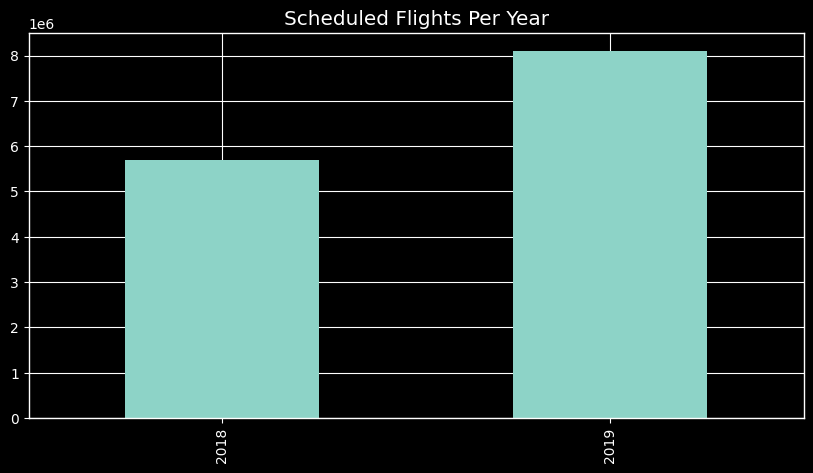

In [65]:
flights_df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year")
    
plt.show()

#### By Month

In [71]:
df_agg = (
    flights_df.query("Year != 2020")
    .groupby("Month")["DelayCategory"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["SmallDelays", "MediumDelays", "LargeDelays"]
df_agg[col_order].style.background_gradient(cmap="YlOrRd")

DelayCategory,SmallDelays,MediumDelays,LargeDelays
Month,,,
1,44.795642,30.227801,24.976557
2,42.165823,31.914347,25.919830
3,48.209719,29.883797,21.906484
4,45.963535,29.280486,24.755978
5,43.553317,29.446820,26.999863
6,40.473181,29.766865,29.759953
7,41.668324,29.149344,29.182332
8,41.166109,29.228066,29.605824
9,47.693608,28.600698,23.705694
